In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# lOADING THE TRAINED MODEL
cnn = tf.keras.models.load_model('trained_model.h5')

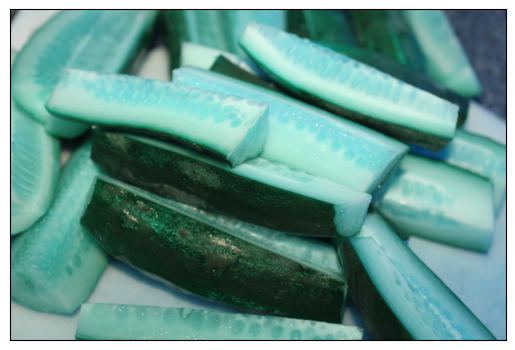

In [40]:
# Visulaizing and Predicting an Image
import cv2
img_path = 'F:/ML/test/cucumber/Image_5.jpg'
img = cv2.imread(img_path)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

In [41]:
# TESTING MODEL
image = tf.keras.preprocessing.image.load_img(img_path, target_size=(64,64))
# Converting a single image to batch 
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 63ms/step


In [42]:
print(predictions)
print(max(predictions[0]))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0


In [43]:
# Preprocessing the Test set
test_set = tf.keras.utils.image_dataset_from_directory(
        'F:/ML/test',
        labels = 'inferred',
        label_mode = 'categorical',
        class_names=None,
        color_mode = 'rgb',
        batch_size = 32,
        image_size = (64,64),
        shuffle = True,
        seed = None,
        validation_split = None,
        subset = None,
        interpolation = 'bilinear',
        follow_links = False,
        crop_to_aspect_ratio = False
)                                              

Found 359 files belonging to 36 classes.


In [44]:
print(test_set.class_names)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [45]:
#Predicting the image by numpy array
resultIndex = np.where(predictions[0] == max(predictions[0]))
print(resultIndex)

(array([10], dtype=int64),)


In [46]:
# Single Prediction
print("The given image is {}".format(test_set.class_names[resultIndex[0][0]].capitalize()))

The given image is Cucumber
